In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer

**Завантаження даних**
-

**_Файл DATA_2D.CSV_**

In [2]:
# Файл не має назв колонок: вони задаються окремо через names
data_2d = pd.read_csv(Path("data") / "data_2d.csv", names=["cluster", "value_x", "value_y"])
print(data_2d.shape, data_2d.columns)
data_2d

(200, 3) Index(['cluster', 'value_x', 'value_y'], dtype='object')


,cluster,value_x,value_y
0,0.0,-0.768716,0.460860
1,0.0,2.687848,2.366961
2,0.0,-0.201379,0.470430
3,0.0,0.608496,1.225400
4,0.0,-0.082282,1.137218
...,...,...,...
195,1.0,0.629144,4.378584
196,1.0,-0.723824,5.361801
197,1.0,1.346107,2.333476
198,1.0,3.608219,3.411546


In [3]:
data_2d.describe()

,cluster,value_x,value_y
count,200.000000,200.000000,200.000000
mean,0.500000,1.758886,2.211502
std,0.501255,1.239986,1.605176
min,0.000000,-1.488928,-1.344141
25%,0.000000,0.874456,0.955211
50%,0.500000,1.729753,2.282891
75%,1.000000,2.701499,3.602253
max,1.000000,4.554605,5.722027


<Axes: title={'center': 'Цікаво, що за першою колонкою data_2d, схоже, вже поділений на кластери'}, xlabel='value_x', ylabel='value_y'>

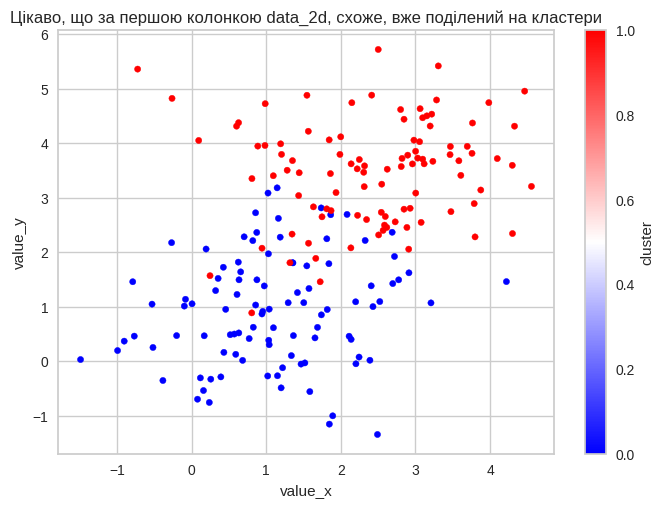

In [4]:
data_2d.plot.scatter(x="value_x", y="value_y",
                     title="Цікаво, що за першою колонкою data_2d, схоже, вже поділений на кластери",
                     c="cluster", cmap='bwr')

**_Файл MNIST.CSV_**

In [5]:
mnist = pd.read_csv(Path("data") / "mnist.csv", names=[f"f{i}" for i in range(1,785+1)])
mms = MinMaxScaler()
mnist[mnist.columns] = mms.fit_transform(mnist)
print(mnist.shape)
mnist.describe()

(500, 785)


,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f776,f777,f778,f779,f780,f781,f782,f783,f784,f785
count,500.000000,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,...,500.000000,500.000000,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0
mean,0.486444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.002000,0.002000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.319329,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.044721,0.044721,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.222222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.444444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.777778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**ЗАВДАННЯ 1**
-
1. Щоб знайти оптимальну кількість кластерів, скористаємося ліктевим методом.
2. Для кожного з завантажених дейтасетів застосуємо алгоритм **K-means** для кластеризації відповідно до знайденої кількості кластерів. 

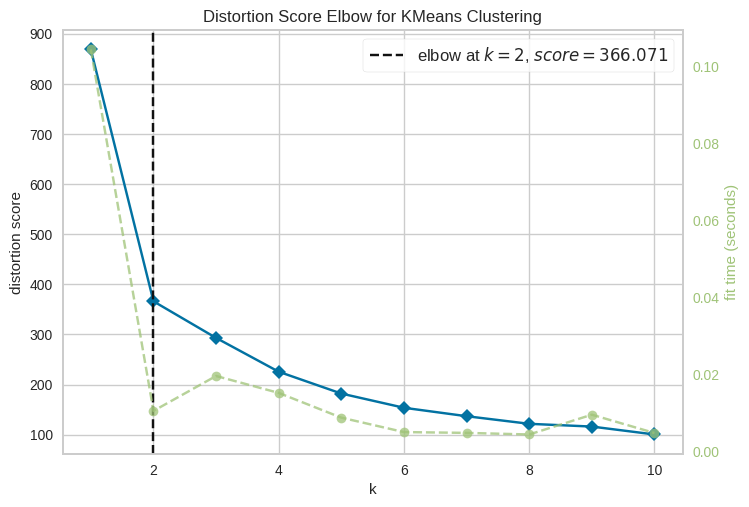

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [6]:
km_2d = KMeans(random_state=50, n_init="auto")
view_2d = KElbowVisualizer(km_2d, k=(1,11))
view_2d.fit(data_2d) # Навчаємо даними для візуалізації
view_2d.show()       # Формуємо та показуемо "ліктевий" графік

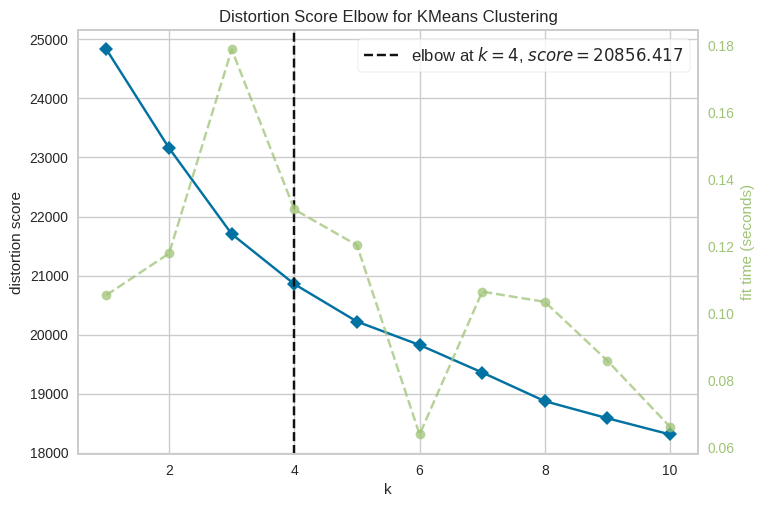

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [7]:
km_mnist = KMeans(random_state=50, n_init="auto")
view_2d = KElbowVisualizer(km_mnist, k=(1,11))
view_2d.fit(mnist) # Навчаємо даними для візуалізації
view_2d.show()     # Формуємо та показуемо "ліктевий" графік

**Висновок:**
-
1. Для дейтасету **DATA_2D** оптимальна кількість кластерів: **2**
2. Для дейтасету **MNIST** оптимальна кількість кластерів: **4**

**ЗАВДАННЯ 2**
-
Візуалізація результатів роботи кластеризації

Text(0.5, 1.0, 'DATA_2D clusterization')

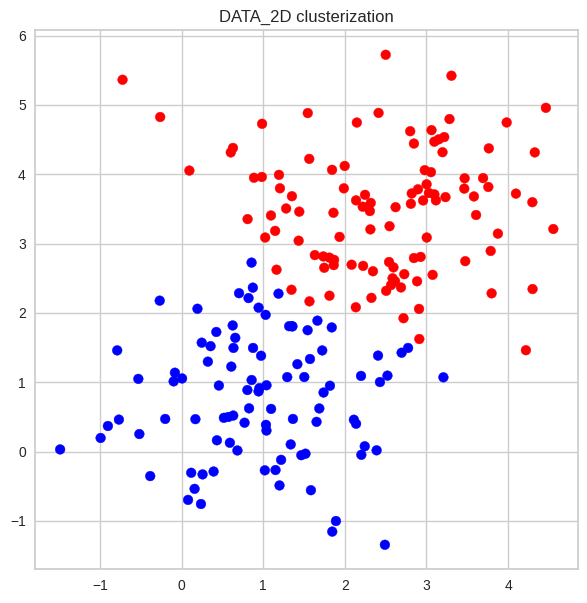

In [8]:
km_2d = KMeans(n_clusters=2, n_init = 'auto').fit(data_2d)
labs = km_2d.labels_
plt.figure(figsize=[7, 7])
plt.grid(visible=True)
plt.scatter(data_2d['value_x'], data_2d['value_y'], c=labs, cmap='bwr')
plt.title('DATA_2D clusterization')

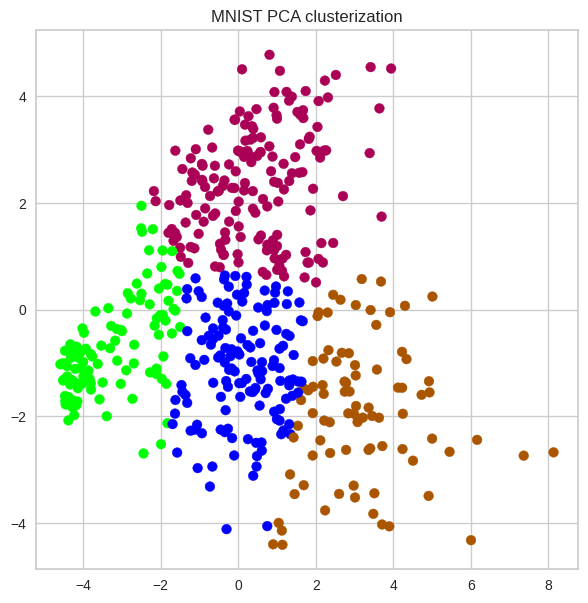

In [9]:
pca_2d = PCA(n_components=2).fit_transform(mnist)
pca_2d = pd.DataFrame(pca_2d)
km_mnist_2d = KMeans(n_clusters=4, n_init = 'auto').fit(pca_2d)
plt.figure(figsize=[7, 7])
plt.title('MNIST PCA clusterization')
plt.scatter(pca_2d[0], pca_2d[1], c=km_mnist_2d.labels_, cmap='brg')